In [1]:
!python -m pip install nltk


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 3.0 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.2 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import nltk


In [3]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kaila\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kaila\AppData\Roaming\nltk_data...


True

In [4]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re

In [8]:
df=pd.read_csv('NLP_dataset.csv',encoding='latin-1')

In [9]:
df

,Reviews
0,"""Great cooler.. excellent air flow and for thi..."
1,"""Best budget 2 fit cooler. Nice cooling"","
2,"""The quality is good but the power of air is d..."
3,"""Very bad product it's a only a fan"","
4,"""Ok ok product"","
5,"""The cooler is really fantastic and provides g..."
6,"""Very good product"","
7,"""Very nice"","
8,"""Very bad cooler"","
9,"""Very good"","


In [37]:
def preprocessing(text):
  text = str(text)
  text=re.sub(r'\d+','',text) #remove num
  text=text.translate(str.maketrans('','',string.punctuation)) #remove punc
  text=text.lower()
  text = ' '.join([word for word in text.split() if word not in stopwords.words('english')]) #remove stopwords
  text = ' '.join([WordNetLemmatizer().lemmatize(word) for word in text.split()]) #lemmantization
  return text

preprocessed=[preprocessing(text) for text in df['Reviews']]

In [11]:
preprocessed

['great cooler excellent air flow price amazing unbelievable love \x83\x9d\x8b\x8f',
 'best budget fit cooler nice cooling',
 'quality good power air decent',
 'bad product fan',
 'ok ok product',
 'cooler really fantastic provides good air flow highly recommended',
 'good product',
 'nice',
 'bad cooler',
 'good',
 'beautiful product good material perfectly working',
 'awesome',
 'good',
 'wonderful product must buy',
 'nice air cooler smart cool breeze producer',
 'awsm',
 'nice product \x8d',
 'great cooler',
 'nice product',
 'good \x8d',
 'nice product \x8d',
 'good product',
 'nice product reasonable price',
 'like it\x83\x9d\x9c\x8b\x8f',
 'goodd',
 'good product',
 'good product kawaleti',
 'good cooler amazing beautiful design affordable price',
 'using since month great experience',
 'good performance nice look',
 'product good strong thrust air flow must buy',
 'good \x8d',
 'bad quality']

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector= TfidfVectorizer()
X=vector.fit_transform(preprocessed)

In [13]:
df_tfidf=pd.DataFrame(X.toarray(), columns=vector.get_feature_names_out())
df_tfidf

,affordable,air,amazing,awesome,awsm,bad,beautiful,best,breeze,budget,...,reasonable,recommended,since,smart,strong,thrust,unbelievable,using,wonderful,working
0,0.000000,0.275011,0.344718,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.385495,0.000000,0.000000,0.0000
1,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.457548,0.000000,0.457548,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
2,0.000000,0.379510,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
3,0.000000,0.000000,0.000000,0.0,0.0,0.592197,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
4,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
5,0.000000,0.273324,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.383131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
6,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
7,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
8,0.000000,0.000000,0.000000,0.0,0.0,0.788786,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
9,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
map={'positive':1, 'negative':-1,'neutral':0}

y=[1, 1, 0, -1, 0, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1]

In [16]:
x_train,x_test,y_train,y_test=train_test_split(df_tfidf,y,test_size=0.2,random_state=42)

In [17]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [18]:
y_pred=lr.predict(x_test)

In [19]:
y_test

[1, 1, 1, 1, -1, 1, 1]

In [20]:
lr.score(x_test,y_test)

0.8571428571428571

In [21]:
print(accuracy_score(y_pred,y_test))

0.8571428571428571


In [23]:
dt=pd.read_csv('Datasets/train.csv',encoding='latin-1')

In [24]:
dt

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


In [28]:
inp=dt.drop(columns=['textID','selected_text','Time of Tweet','Age of User','Country','Population -2020','Land Area (Km²)','Density (P/Km²)'])


In [29]:
inp

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


In [38]:
x=[preprocessing(text) for text in inp['text']]

In [40]:
x

['id responded going',
 'sooo sad miss san diego',
 'bos bullying',
 'interview leave alone',
 'son couldnt put release already bought',
 'httpwwwdothebouncycomsmf shameless plugging best ranger forum earth',
 'feeding baby fun smile coo',
 'soooo high',
 '',
 'journey wow u became cooler hehe possible',
 'much love hopeful reckon chance minimal p im never gonna get cake stuff',
 'really really like song love story taylor swift',
 'sharpie running dangerously low ink',
 'want go music tonight lost voice',
 'test test lg env',
 'uh oh sunburned',
 'sok trying plot alternative speak sigh',
 'ive sick past day thus hair look wierd didnt hat would look httptinyurlcommnfkw',
 'back home gonna miss every one',
 'he',
 'oh marly im sorry hope find soon',
 'playing ghost online really interesting new update kirin pet metamorph third job cant wait dragon pet',
 'cleaning house family comming later today',
 'gotta restart computer thought win supposed put end constant rebootiness',
 'see wat mea

In [39]:
y=inp['sentiment'].apply(lambda x: 1 if x == 'positive' else (-1 if x == 'negative' else 0))

In [41]:
y

0        0
1       -1
2       -1
3       -1
4       -1
        ..
27476   -1
27477   -1
27478    1
27479    1
27480    0
Name: sentiment, Length: 27481, dtype: int64

In [42]:
tf=TfidfVectorizer()
x=tf.fit_transform(x)

In [52]:
pd.DataFrame(x.toarray(),columns=tf.get_feature_names_out())

,aa,aaa,aaaa,aaaaaaaaaaa,aaaaaaaaaahhhhhhhh,aaaaaaaaaamazing,aaaaaaaafternoon,aaaaaaaahhhhhhhh,aaaaaah,aaaaaahhhhhhhh,...,â½tearã,â½timo,â½ureo,â½ve,â½why,â½whyyy,â½y,â½you,â½z,â½ã
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [45]:
lrr=LogisticRegression()
lrr.fit(x_train,y_train)

LogisticRegression()

In [46]:
lrr.score(x_test,y_test)

0.6825541204293251

In [47]:
y_pred=lrr.predict(x_test)

In [48]:
print(accuracy_score(y_pred,y_test))

0.6825541204293251


In [1]:
import nltk
import random
import string

from nltk.chat.util import Chat, reflections
from nltk.corpus import wordnet


nltk.download('punkt')
nltk.download('wordnet')


pairs = [
    ["hi|hello|hey", ["Hello!", "Hi there!", "Hey!"]],
    ["what is your name?", ["I'm a Chatbot!", "You can call me Bot."]],
    ["how are you?", ["I'm fine, thank you!", "Doing well!"]],
    ["bye|goodbye", ["Bye!", "See you!", "Goodbye!"]],
]


chatbot = Chat(pairs, reflections)
chatbot.converse()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kaila\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kaila\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Hi there!
I'm fine, thank you!
None
Goodbye!


KeyboardInterrupt: Interrupted by user

In [1]:
!pip install googletrans==4.0.0-rc1

In [3]:
# Install googletrans
# 

from googletrans import Translator

# Initialize the Translator
translator = Translator()

# Text to translate
text = "Hello, how are you?"

# Translate to Tamil
translated = translator.translate(text, dest='ta')
print(f"Original: {text}")
print(f"Translated (Tamil): {translated.text}")

# Translate to Hindi
translated_hi = translator.translate(text, dest='hi')
print(f"Translated (Hindi): {translated_hi.text}")



Original: Hello, how are you?
Translated (Tamil): வணக்கம், நீங்கள் எப்படி இருக்கிறீர்கள்?
Translated (Hindi): नमस्ते, आप कैसे हैं?


In [6]:
from googletrans import Translator

translator = Translator()

source_text = input("Enter text: ")
dest_lang = input("Enter language code to translate to (e.g., ta, hi, fr): ")

translated = translator.translate(source_text, dest=dest_lang)
print("Translated:", translated.text)


Translated: வணக்கம்


In [7]:
from tkinter import *
from googletrans import Translator, LANGUAGES


translator = Translator()


def translate_text():
    input_text = source_text.get("1.0", END)
    dest_lang_code = lang_var.get()
    if input_text.strip() and dest_lang_code:
        translation = translator.translate(input_text, dest=dest_lang_code)
        translated_text.delete("1.0", END)
        translated_text.insert(END, translation.text)


root = Tk()
root.title("Language Translator")
root.geometry("500x400")
root.configure(bg="#f0f0f0")

# Language dropdown setup
lang_var = StringVar()
lang_var.set("ta")  # default to Tamil

language_codes = list(LANGUAGES.keys())
language_names = [LANGUAGES[code].title() for code in language_codes]
lang_menu = OptionMenu(root, lang_var, *language_codes)
lang_menu.pack(pady=10)

# Input Text Box
Label(root, text="Enter text to translate:", bg="#f0f0f0").pack()
source_text = Text(root, height=5, width=50)
source_text.pack(pady=10)

# Translate Button
Button(root, text="Translate", command=translate_text).pack(pady=10)

# Output Text Box
Label(root, text="Translated text:", bg="#f0f0f0").pack()
translated_text = Text(root, height=5, width=50)
translated_text.pack(pady=10)

root.mainloop()


In [1]:
import tkinter as tk
from tkinter import ttk
from googletrans import Translator
import pyttsx3
import speech_recognition as sr
from nltk.chat.util import Chat, reflections
import nltk

# Ensure nltk resources are available
nltk.download('punkt')

# Sample chatbot pairs
pairs = [
    ["hi|hello|hey", ["Hello!", "Hi there!", "Hey!"]],
    ["what is your name?", ["I'm a Chatbot!", "You can call me Bot."]],
    ["how are you?", ["I'm fine, thank you!", "Doing well!"]],
    ["bye|goodbye", ["Bye!", "See you!", "Goodbye!"]],
]

# Initialize chatbot, translator, and text-to-speech engine
chat = Chat(pairs, reflections)
translator = Translator()
tts_engine = pyttsx3.init()

# GUI App
class ChatbotGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Smart Chatbot")
        self.root.geometry("600x500")
        self.root.configure(bg="#f0f0f0")

        self.lang_var = tk.StringVar()
        self.lang_var.set("en")

      
        self.chat_display = tk.Text(root, height=20, width=70, state='disabled', bg="white")
        self.chat_display.pack(pady=10)

      
        frame = tk.Frame(root, bg="#f0f0f0")
        frame.pack()

        self.user_input = tk.Entry(frame, width=40)
        self.user_input.pack(side=tk.LEFT, padx=5)
        self.user_input.bind("<Return>", self.send_message)

        send_btn = tk.Button(frame, text="Send", command=self.send_message)
        send_btn.pack(side=tk.LEFT)

        voice_btn = tk.Button(frame, text="🎤", command=self.listen_voice)
        voice_btn.pack(side=tk.LEFT)

        
        tk.Label(root, text="Translate Bot Reply To:", bg="#f0f0f0").pack(pady=(5, 0))
        lang_menu = ttk.Combobox(root, textvariable=self.lang_var, values=["en", "ta", "hi", "fr", "ja"], width=10)
        lang_menu.pack()

    def speak(self, text):
        tts_engine.say(text)
        tts_engine.runAndWait()

    def send_message(self, event=None):
        user_text = self.user_input.get().strip()
        if not user_text:
            return
        self.display_chat("You", user_text)
        self.user_input.delete(0, tk.END)
        bot_reply = chat.respond(user_text.lower())

        if not bot_reply:
            bot_reply = "I don't understand that."

       
        lang = self.lang_var.get()
        display_reply = bot_reply
        if lang != "en":
            try:
                display_reply = translator.translate(bot_reply, dest=lang).text
            except:
                display_reply = "(Translation Error)"

        self.display_chat("Bot", display_reply)
        self.speak(display_reply)

    def listen_voice(self):
        recognizer = sr.Recognizer()
        with sr.Microphone() as source:
            self.display_chat("System", "Listening...")
            try:
                audio = recognizer.listen(source, timeout=5)
                command = recognizer.recognize_google(audio)
                self.user_input.delete(0, tk.END)
                self.user_input.insert(0, command)
                self.send_message()
            except sr.UnknownValueError:
                self.display_chat("System", "Could not understand audio.")
            except sr.RequestError:
                self.display_chat("System", "Speech service error.")
            except:
                self.display_chat("System", "Listening timed out.")

    def display_chat(self, sender, message):
        self.chat_display.config(state='normal')
        self.chat_display.insert(tk.END, f"{sender}: {message}\n")
        self.chat_display.see(tk.END)
        self.chat_display.config(state='disabled')


if __name__ == "__main__":
    root = tk.Tk()
    app = ChatbotGUI(root)
    root.mainloop()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kaila\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
!pip install spacy


In [2]:
!python -m spacy download en_core_web_sm


C:\Users\Kaila\AppData\Local\Programs\Python\Python311\python.exe: No module named spacy


In [1]:
import spacy
nlp=spacy.load("en_core_web_sm")

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [7]:
import nltk
nltk.download('punkt', download_dir='C:/nltk_data')
nltk.data.path.append('C:/nltk_data')

from nltk.tokenize import sent_tokenize

text = "hi, how are you? I am fine."
print(sent_tokenize(text))


[nltk_data] Downloading package punkt to C:/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Kaila/nltk_data'
    - 'c:\\Users\\Kaila\\.pyenv\\pyenv-win\\versions\\3.10.0\\nltk_data'
    - 'c:\\Users\\Kaila\\.pyenv\\pyenv-win\\versions\\3.10.0\\share\\nltk_data'
    - 'c:\\Users\\Kaila\\.pyenv\\pyenv-win\\versions\\3.10.0\\lib\\nltk_data'
    - 'C:\\Users\\Kaila\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:/nltk_data'
**********************************************************************


In [2]:
import spacy
nlp = spacy.blank('en')


In [9]:
dr="i am let's iron man. hi "
doc = nlp(dr)

for token in doc:
    print(token)

i
am
let
's
iron
man
.
hi


In [10]:
d=doc[0]
type(d)

spacy.tokens.token.Token

In [13]:
dir(doc)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_bulk_merge',
 '_context',
 '_get_array_attrs',
 '_realloc',
 '_vector',
 '_vector_norm',
 'cats',
 'char_span',
 'copy',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_dict',
 'from_disk',
 'from_docs',
 'from_json',
 'get_extension',
 'get_lca_matrix',
 'has_annotation',
 'has_extension',
 'has_unknown_spaces',
 'has_vector',
 'is_nered',
 'is_parsed',
 'is_sentenced',
 'is_tagged',
 'lang',
 'lang_',
 'mem',
 'noun_chunks',
 'noun_chunks_iterator',
 'remove_extension',
 'retokenize',
 'sentiment',
 'sents',
 'set

In [11]:
d.

False

In [1]:
import spacy
op=spacy.load('en_core_web_sm')

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [2]:
!pip install scikit-learn

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ------ --------------------------------- 1.8/10.7 MB 9.1 MB/s eta 0:00:01
   ---------------------- ----------------- 6.0/10.7 MB 14.7 MB/s eta 0:00:01
   -------------------------------------- - 10.2/10.7 MB 15.9 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.7 MB 16.4 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 10.5 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- --

In [3]:
import numpy as np 
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
!python -m spacy download en_core_web_sm

Traceback (most recent call last):
  File "C:\Users\Kaila\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\urllib3\connection.py", line 198, in _new_conn
    sock = connection.create_connection(
  File "C:\Users\Kaila\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\Kaila\.pyenv\pyenv-win\versions\3.10.0\lib\socket.py", line 955, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\Kaila\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\urllib3\connectionpool.py", line 787, in urlopen
    response = self._make_request(
  File "C:\Users\Kaila\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\urllib3\connectionpool.py", line 4

In [2]:
import spacy
op=spacy.load('en_core_web_sm')

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [18]:
from googletrans import Translator
translator = Translator()

In [19]:
text="hi hello how are you"

tr= translator.translate(text, dest='ta')
print(str(tr))

Translated(src=en, dest=ta, text=ஹாய் ஹலோ நீங்கள் எப்படி இருக்கிறீர்கள், pronunciation=None, extra_data="{'confiden...")


In [20]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd

In [22]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [28]:
x_train= x_train/255
x_test= x_test/255

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

c:\Users\Kaila\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(x_train,y_train,epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8278 - loss: 0.5585 - val_accuracy: 0.9589 - val_loss: 0.1327
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9482 - loss: 0.1697 - val_accuracy: 0.9666 - val_loss: 0.1083
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9608 - loss: 0.1285 - val_accuracy: 0.9702 - val_loss: 0.1031
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9674 - loss: 0.1083 - val_accuracy: 0.9747 - val_loss: 0.0855
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9727 - loss: 0.0873 - val_accuracy: 0.9752 - val_loss: 0.0798
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9740 - loss: 0.0822 - val_accuracy: 0.9781 - val_loss: 0.0751
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9773 - loss: 0.0742 - val_accuracy: 0.9769 - val_loss: 0.0758
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9789 - loss: 0.0681 - 

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [41]:
!python -m pip install seaborn

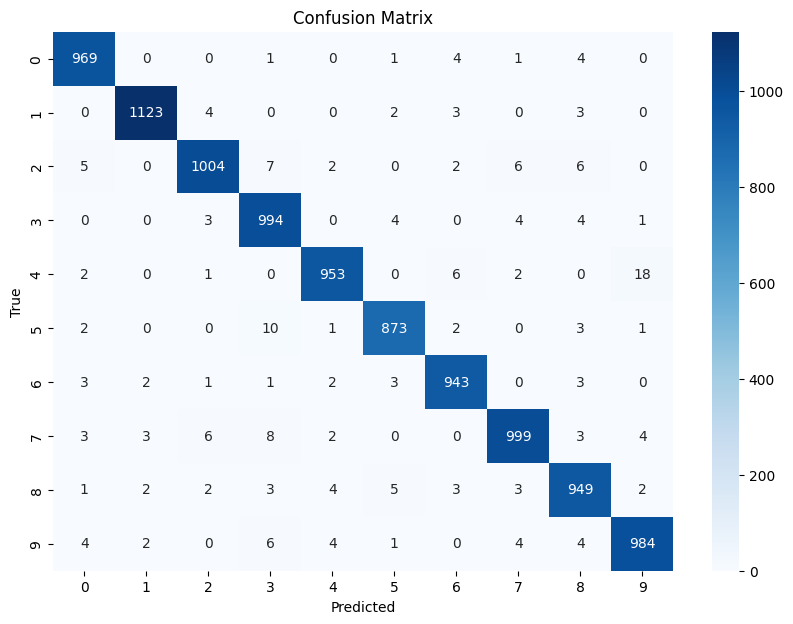

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [45]:
from keras.layers import Conv2D , MaxPooling2D

In [47]:
cnn = keras.Sequential([
    Conv2D(32,kernel_size=(2,2),input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,kernel_size=(2,2)),
    MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

c:\Users\Kaila\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
x_train= x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [53]:
cnn.fit(x_train,y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8646 - loss: 0.4253